# import some lib

In [45]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, make_scorer
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

#load data

In [46]:
data=pd.read_csv("/content/train.csv",delimiter=',')

# get some information about the data

In [47]:
print('the shape of the data '+f'{data.shape}')

the shape of the data (990, 194)


In [48]:
# describe the data
data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [49]:
# check if there are null values in any columns
print("="*50)
print("the number of null values in any column ",end="")
print(list(data.isna().sum()))
print("="*50)
# check if there a null values in all dataset
print("the number of null values in all the dataset = ",end="")
print(data.isna().sum().sum())
print("="*50)

the number of null values in any column [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
the number of null values in all the dataset = 0


In [50]:
# check the duplicate rows in the dataset
print("the number of duplicate rows in the dataset = "+ str(data.duplicated().sum()))

the number of duplicate rows in the dataset = 0


# the visualization
 - we have tree main features so we will plot the correlation between them 
  - internal correlation each feature with self


<Axes: >

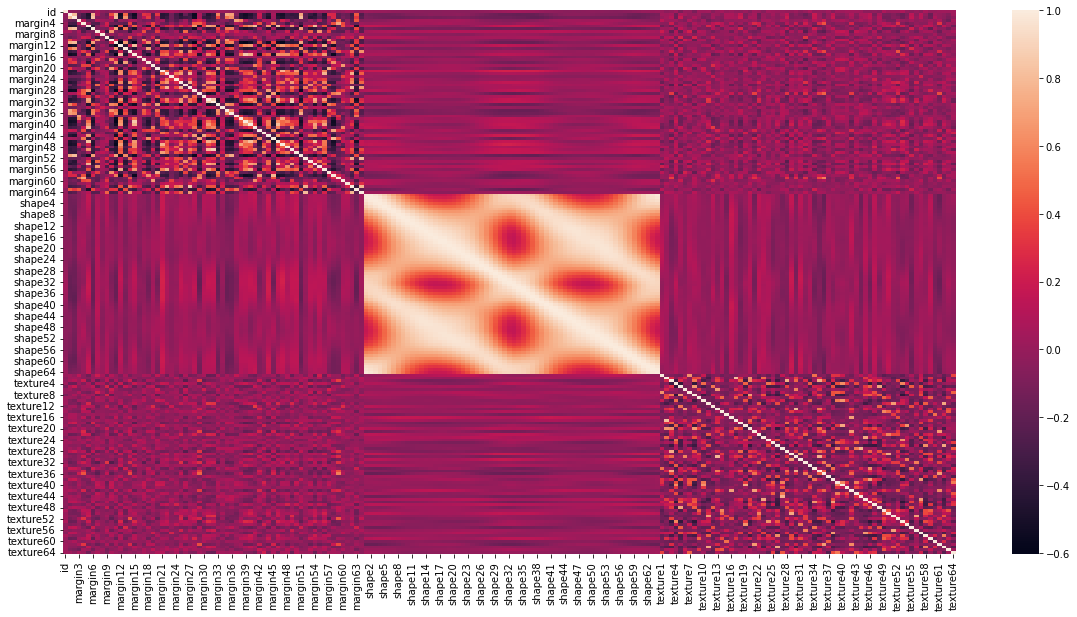

In [170]:
# corrolation between all features 
plt.figure(figsize=(20,10))
sb.heatmap(data.corr())

In [7]:
index =64
start=2

In [8]:
#get margin dataframe
margin  = data.iloc[:,start:start+index]
print(margin.shape)
# margin

(990, 64)


In [9]:
#get shape dataframe
shape = data.iloc[:,start+index:start+2*index]
print(shape.shape)
# shape

(990, 64)


In [10]:
#get tuxture dataframe
texture   = data.iloc[:,start+2*index:]
print(texture.shape)
# texture

(990, 64)


internal corrolation

<Axes: >

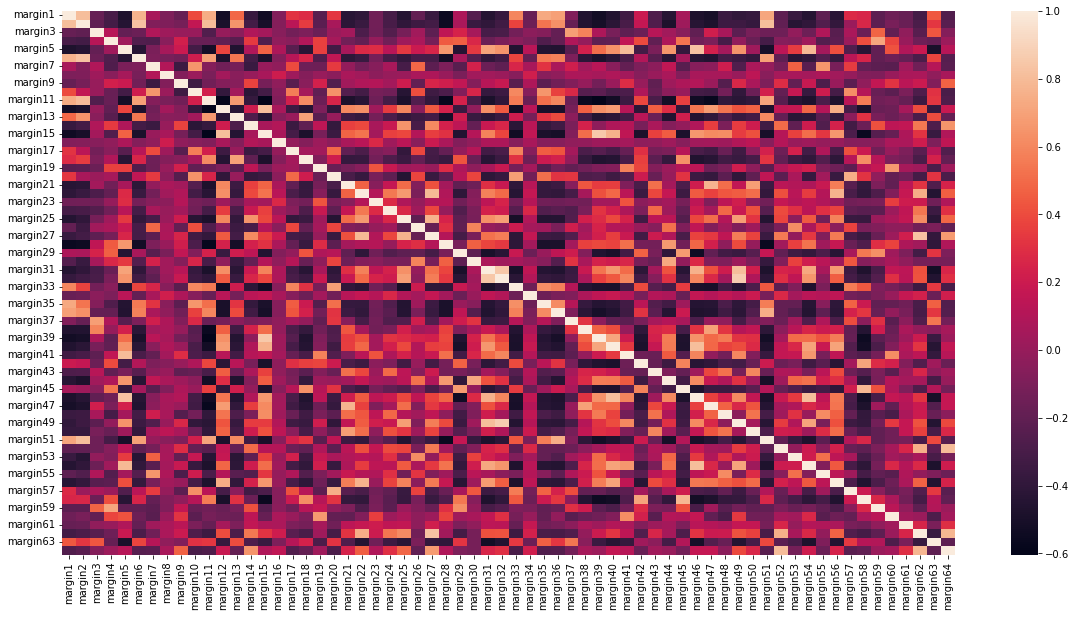

In [166]:
# corrolation between margin
plt.figure(figsize=(20,10))
sb.heatmap(margin.corr())

<Axes: >

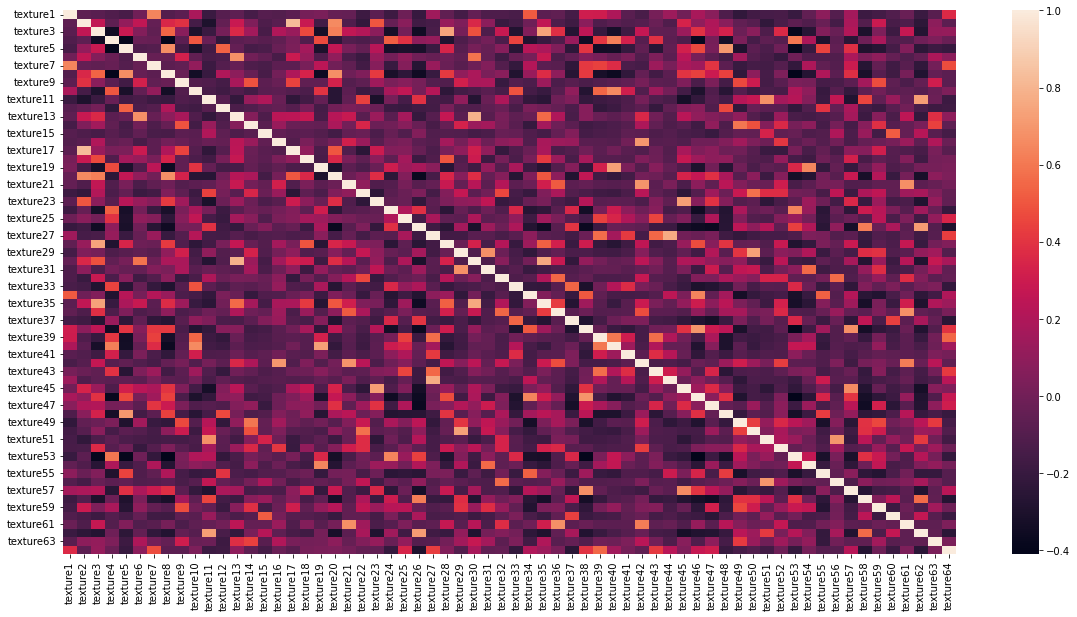

In [167]:
# corrolation between texture
plt.figure(figsize=(20,10))
sb.heatmap(texture.corr())

<Axes: >

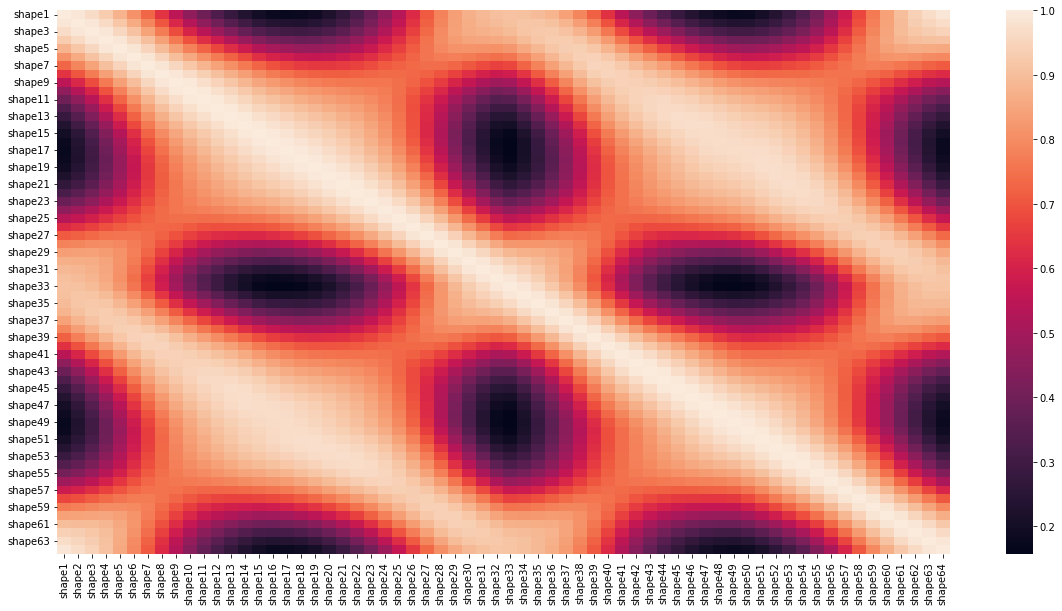

In [168]:
# corrolation between shape
plt.figure(figsize=(20,10))
sb.heatmap(shape.corr())

# check the outlyers

In [100]:
# we have 99 class
len(data['species'].unique())


99

In [107]:
#list of classes
classes=list(data['species'].unique())
classes

['Acer_Opalus',
 'Pterocarya_Stenoptera',
 'Quercus_Hartwissiana',
 'Tilia_Tomentosa',
 'Quercus_Variabilis',
 'Magnolia_Salicifolia',
 'Quercus_Canariensis',
 'Quercus_Rubra',
 'Quercus_Brantii',
 'Salix_Fragilis',
 'Zelkova_Serrata',
 'Betula_Austrosinensis',
 'Quercus_Pontica',
 'Quercus_Afares',
 'Quercus_Coccifera',
 'Fagus_Sylvatica',
 'Phildelphus',
 'Acer_Palmatum',
 'Quercus_Pubescens',
 'Populus_Adenopoda',
 'Quercus_Trojana',
 'Alnus_Sieboldiana',
 'Quercus_Ilex',
 'Arundinaria_Simonii',
 'Acer_Platanoids',
 'Quercus_Phillyraeoides',
 'Cornus_Chinensis',
 'Liriodendron_Tulipifera',
 'Cytisus_Battandieri',
 'Rhododendron_x_Russellianum',
 'Alnus_Rubra',
 'Eucalyptus_Glaucescens',
 'Cercis_Siliquastrum',
 'Cotinus_Coggygria',
 'Celtis_Koraiensis',
 'Quercus_Crassifolia',
 'Quercus_Kewensis',
 'Cornus_Controversa',
 'Quercus_Pyrenaica',
 'Callicarpa_Bodinieri',
 'Quercus_Alnifolia',
 'Acer_Saccharinum',
 'Prunus_X_Shmittii',
 'Prunus_Avium',
 'Quercus_Greggii',
 'Quercus_Suber'

In [125]:
#check the number of outlier in all dataset
from scipy import stats
newdata=data.copy()
newdata.drop(axis=1,columns=['id','species'],inplace=True)
outlier_foreach_class = []
for c in classes:
    outlier_foreach_class.append((np.abs(stats.zscore(newdata[data['species'] == classes[0]])) > 3).sum());
print('number of outliers: {0}\n'.format(np.array(outlier_foreach_class).sum()))

number of outliers: 0



# split the data

In [51]:
x=data.iloc[:,2:].copy()
y=data.iloc[:,1].copy()

In [52]:
from sklearn.model_selection import train_test_split
# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0,shuffle=False)

In [53]:
X_test

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
792,0.015625,0.041016,0.044922,0.033203,0.009766,0.042969,0.039062,0.005859,0.000000,0.025391,...,0.000000,0.000000,0.020508,0.000000,0.046875,0.000000,0.000977,0.000000,0.008789,0.052734
793,0.000000,0.000000,0.017578,0.005859,0.011719,0.000000,0.009766,0.017578,0.005859,0.001953,...,0.079102,0.000000,0.004883,0.013672,0.011719,0.000000,0.000000,0.052734,0.000000,0.023438
794,0.029297,0.011719,0.027344,0.042969,0.000000,0.087891,0.005859,0.000000,0.003906,0.058594,...,0.022461,0.000000,0.107420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000977,0.025391
795,0.003906,0.000000,0.025391,0.050781,0.017578,0.000000,0.013672,0.000000,0.007812,0.009766,...,0.000000,0.000000,0.003906,0.001953,0.079102,0.000000,0.000000,0.000977,0.000000,0.011719
796,0.005859,0.003906,0.029297,0.003906,0.015625,0.011719,0.031250,0.000000,0.009766,0.017578,...,0.000000,0.000000,0.049805,0.000000,0.032227,0.000000,0.000000,0.000000,0.003906,0.045898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.000000,0.001953,0.042969,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.000000,0.029297,0.003906,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.000000,0.003906,0.000000,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.000000,0.037109,0.001953,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


# Normaliz the data

In [15]:
train_mean=X_train.mean()
train_std=X_train.std()
train_Norm=(X_train-train_mean)/train_std
test_Norm=(X_test-train_mean)/train_std

In [58]:
print('train mean')
train_mean

train mean


margin1      0.017479
margin2      0.028752
margin3      0.032111
margin4      0.022976
margin5      0.014577
               ...   
texture60    0.014301
texture61    0.002488
texture62    0.020737
texture63    0.008902
texture64    0.019292
Length: 192, dtype: float64

In [60]:
print('train std')
train_std

train std


margin1      0.019985
margin2      0.038593
margin3      0.026275
margin4      0.028327
margin5      0.018660
               ...   
texture60    0.060251
texture61    0.010980
texture62    0.040717
texture63    0.014025
texture64    0.022956
Length: 192, dtype: float64

# encoding the target

In [62]:
#import label encoder
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test  = label_encoder.transform(y_test)


# models
- we will create many models with change in the paramiter

## model #1
- change the rate of drop out

#### Trial1
- drop out rate=.2
- we get
  -  accuracy: 1.0000 on the training data
  - accuracy: 0.9594 on the testing data


In [171]:
# model number one
drop_out_rate=.2
weight_decay=.01
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
Adam = tf.keras.optimizers.Adam( learning_rate=.1, weight_decay=weight_decay )
# ============================================================================
# ============================================================================
model11 = keras.Sequential()
model11.add(keras.Input(shape=(192,)))
model11.add(layers.Dense(100, activation="tanh",))
model11.add(Dropout(drop_out_rate))
model11.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model11.compile(optimizer=Adam,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history11 = model11.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model11.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9545


[0.13993744552135468, 0.9545454382896423]

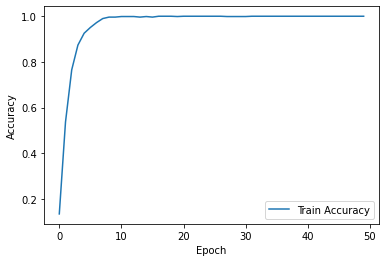

In [64]:
# plot the training acc
plt.plot(history11.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

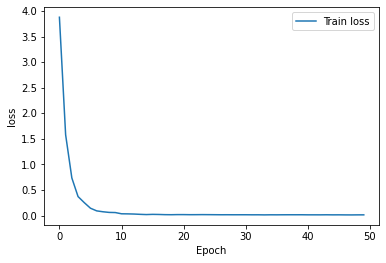

In [185]:
# plot the training acc
plt.plot(history11.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Trial2
- drop out rate=.4
- we get
  -  accuracy: 1.0000 and  loss: 0.0077  on the training data
  - accuracy: 0.9394  and  loss: 0.1335  on the testing data

  

In [68]:
# model number one
drop_out_rate=.4
weight_decay=.01
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
Adam = tf.keras.optimizers.Adam( learning_rate=.1, weight_decay=weight_decay )
# ============================================================================
# ============================================================================
model12 = keras.Sequential()
model12.add(keras.Input(shape=(192,)))
model12.add(layers.Dense(100, activation="tanh",))
model12.add(Dropout(drop_out_rate))
model12.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model12.compile(optimizer=Adam,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history12 = model12.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model12.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1335 - accuracy: 0.9545


[0.1334667056798935, 0.9545454382896423]

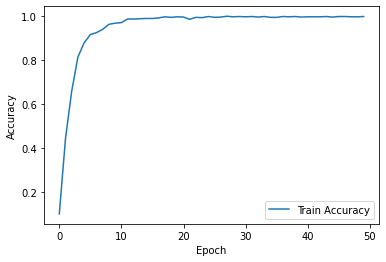

In [70]:
plt.plot(history12.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

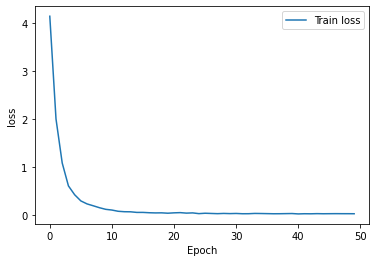

In [184]:
plt.plot(history12.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Trial3
- drop out rate=.7
- we get
  -  accuracy: 1.0000 and  loss: 0.0234  on the training data
  - accuracy: 0.9394  and  loss: 0.1541  on the testing data



In [71]:
# model number one
drop_out_rate=.7
weight_decay=.01
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
Adam = tf.keras.optimizers.Adam( learning_rate=.1, weight_decay=weight_decay )
# ============================================================================
# ============================================================================
model13 = keras.Sequential()
model13.add(keras.Input(shape=(192,)))
model13.add(layers.Dense(100, activation="tanh",))
model13.add(Dropout(drop_out_rate))
model13.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model13.compile(optimizer=Adam,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history13 = model13.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model13.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model13.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9596


[0.1540873795747757, 0.9595959782600403]

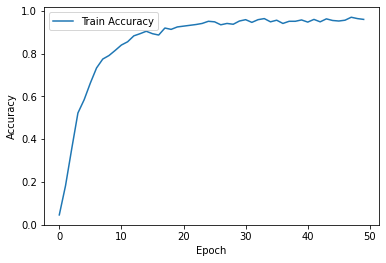

In [72]:
plt.plot(history13.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

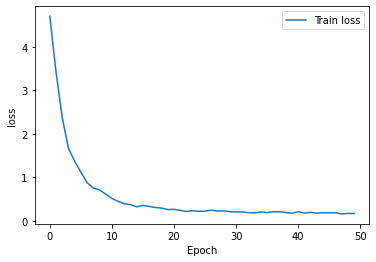

In [183]:
plt.plot(history13.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## model #2
- change the optimizer

#### Trial1
- optimizer Adam

- we get
  -  accuracy: 1.0000 and  loss: 0.0077  on the training data
  - accuracy: 0.9495  and  loss: 0.1706  on the testing data



In [74]:
# model number one
drop_out_rate=.2
weight_decay=.01
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
optimizer    = tf.keras.optimizers.Adam(learning_rate=.1,weight_decay=weight_decay)
# optimizer    = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.1,weight_decay=weight_decay)
# optimizer    = SGD(learning_rate=0.1, momentum=0.9,weight_decay=weight_decay,)
# ============================================================================
# ============================================================================
model21 = keras.Sequential()
model21.add(keras.Input(shape=(192,)))
model21.add(layers.Dense(100, activation="tanh",))
model21.add(Dropout(drop_out_rate))
model21.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model21.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
# ============================================================================
# ============================================================================
# fit model
history21 = model21.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model21.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model21.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1986 - sparse_categorical_accuracy: 0.9444


[0.19863010942935944, 0.9444444179534912]

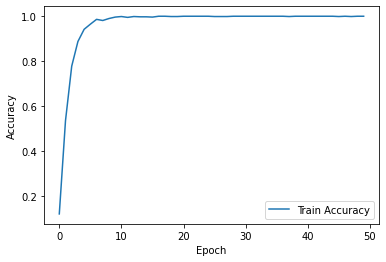

In [75]:
plt.plot(history21.history['sparse_categorical_accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

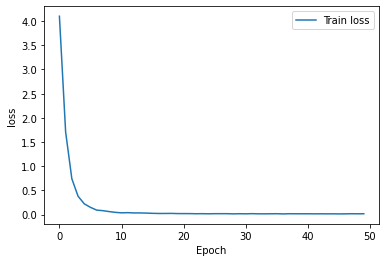

In [182]:
plt.plot(history21.history['loss'], label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Trial2
- optimizer SGD
- we get
  -  accuracy: 0.1856 and  loss: 4.4334  on the training data
  - accuracy: 0.0303  and  loss: 4.5854  on the testing data


In [76]:
# model number one
drop_out_rate=.2
weight_decay=.01
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
# optimizer    = tf.keras.optimizers.Adam(learning_rate=.1,weight_decay=weight_decay)
# optimizer    = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.1,weight_decay=weight_decay)
optimizer    = SGD(learning_rate=0.1, momentum=0.9,weight_decay=weight_decay,)
# ============================================================================
# ============================================================================
model22 = keras.Sequential()
model22.add(keras.Input(shape=(192,)))
model22.add(layers.Dense(100, activation="tanh",))
model22.add(Dropout(drop_out_rate))
model22.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model22.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history22 = model22.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model22.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model22.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 4.5854 - accuracy: 0.0303


[4.585434913635254, 0.03030303120613098]

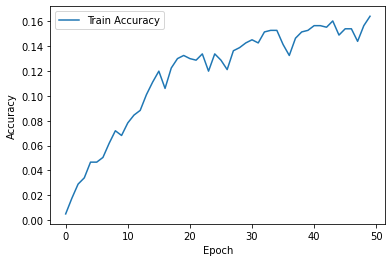

In [78]:
plt.plot(history22.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

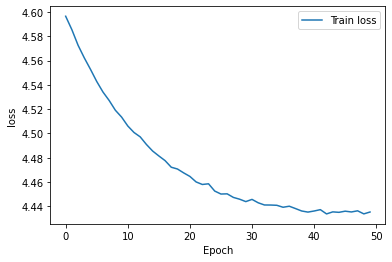

In [181]:
plt.plot(history22.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Trial3
- optimizer RMSprop

- we get
  -  accuracy: 1.0000 and  loss: 0.0040  on the training data
  - accuracy: 0.9495  and  loss: 0.1669  on the testing data



In [79]:
# model number one
drop_out_rate=.2
weight_decay=.01
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
# optimizer    = tf.keras.optimizers.Adam(learning_rate=.1,weight_decay=weight_decay,)
optimizer    = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.1,weight_decay=weight_decay,)
# optimizer    = SGD(learning_rate=0.1, momentum=0.9,weight_decay=weight_decay,)
# ============================================================================
# ============================================================================
model23 = keras.Sequential()
model23.add(keras.Input(shape=(192,)))
model23.add(layers.Dense(100, activation="tanh",))
model23.add(Dropout(drop_out_rate))
model23.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model23.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history23 = model23.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model23.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model23.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.9495


[0.16692261397838593, 0.9494949579238892]

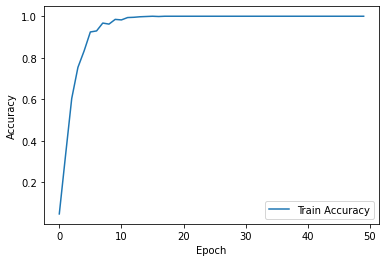

In [80]:
plt.plot(history23.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

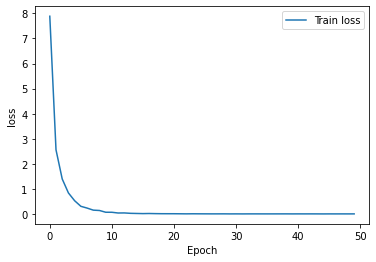

In [180]:
plt.plot(history23.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## model #3
- change the Hidden Size


#### Trial1
- Hidden Size=20
- we get
  -  accuracy: 0.9987 and  loss: 0.0794  on the training data
  - accuracy: 0.9293  and  loss: 0.2989  on the testing data



In [82]:
# model number one
drop_out_rate=.2
weight_decay=.01
Hidden_Size=20
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
optimizer    = tf.keras.optimizers.Adam(learning_rate=.1,weight_decay=weight_decay)
# optimizer    = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.1,weight_decay=weight_decay)
# optimizer    = SGD(learning_rate=0.1, momentum=0.9,weight_decay=weight_decay,)
# ============================================================================
# ============================================================================
model31 = keras.Sequential()
model31.add(keras.Input(shape=(192,)))
model31.add(layers.Dense(Hidden_Size, activation="tanh",))
model31.add(Dropout(drop_out_rate))
model31.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model31.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history31 = model31.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model31.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model31.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.9293


[0.2989051043987274, 0.9292929172515869]

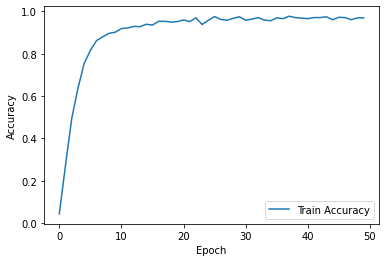

In [84]:
plt.plot(history31.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

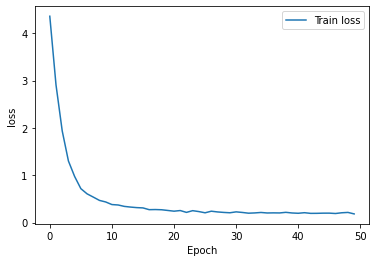

In [179]:
plt.plot(history31.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Trial2
- Hidden_Size =50
- we get
  -  accuracy: 1.0000 and  loss: 0.0168  on the training data
  - accuracy: 0.9495  and  loss: 0.1857  on the testing data



In [85]:
# model number one
drop_out_rate=.2
weight_decay=.01
Hidden_Size=50
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
optimizer    = tf.keras.optimizers.Adam(learning_rate=.1,weight_decay=weight_decay)
# optimizer    = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.1,weight_decay=weight_decay)
# optimizer    = SGD(learning_rate=0.1, momentum=0.9,weight_decay=weight_decay,)
# ============================================================================
# ============================================================================
model32 = keras.Sequential()
model32.add(keras.Input(shape=(192,)))
model32.add(layers.Dense(Hidden_Size, activation="tanh",))
model32.add(Dropout(drop_out_rate))
model32.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model32.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history32 = model32.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model32.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model32.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9495


[0.1857457458972931, 0.9494949579238892]

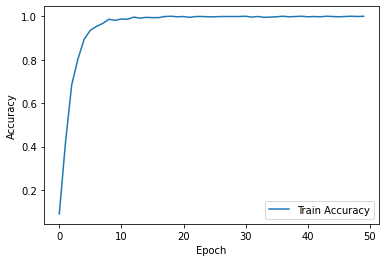

In [86]:
plt.plot(history32.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

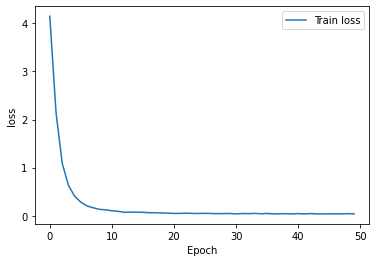

In [178]:
plt.plot(history32.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Trial3
- Hidden_Size=100
- we get
  -  accuracy: 1.0000 and  loss: 0.0087  on the training data
  - accuracy: 0.9545  and  loss: 0.1514  on the testing data


In [87]:
# model number one
drop_out_rate=.2
weight_decay=.01
Hidden_Size=100
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
optimizer    = tf.keras.optimizers.Adam(learning_rate=.1,weight_decay=weight_decay,)
# optimizer    = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.1,weight_decay=weight_decay,)
# optimizer    = SGD(learning_rate=0.1, momentum=0.9,weight_decay=weight_decay,)
# ============================================================================
# ============================================================================
model33 = keras.Sequential()
model33.add(keras.Input(shape=(192,)))
model33.add(layers.Dense(Hidden_Size, activation="tanh",))
model33.add(Dropout(drop_out_rate))
model33.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model33.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history33 = model33.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model33.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model33.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.1514 - accuracy: 0.9545


[0.15136106312274933, 0.9545454382896423]

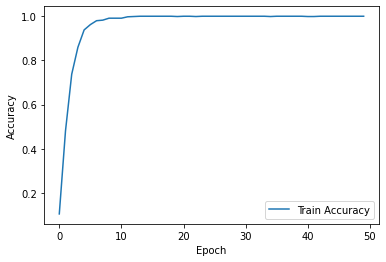

In [88]:
plt.plot(history33.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

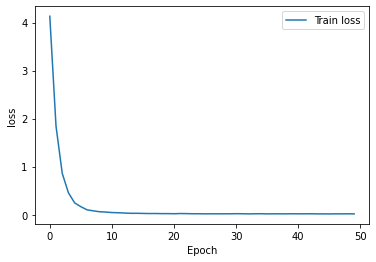

In [177]:
plt.plot(history33.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## model #4
- change the Batch size

#### Trial1
- batch size=792
- we get
  -  accuracy: 0.8119 and  loss: 1.6253  on the training data
  - accuracy: 0.6768  and  loss: 1.9283  on the testing data



In [89]:
# model number one
drop_out_rate=.2
weight_decay=.01
Hidden_Size=20
batch_size=792

# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
optimizer    = tf.keras.optimizers.Adam(learning_rate=.1,weight_decay=weight_decay)
# optimizer    = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.1,weight_decay=weight_decay)
# optimizer    = SGD(learning_rate=0.1, momentum=0.9,weight_decay=weight_decay,)
# ============================================================================
# ============================================================================
model41 = keras.Sequential()
model41.add(keras.Input(shape=(192,)))
model41.add(layers.Dense(Hidden_Size, activation="tanh",))
model41.add(Dropout(drop_out_rate))
model41.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
# model41.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model41.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ============================================================================
# ============================================================================
# fit model
history41 = model41.fit(X_train, y_train, batch_size=batch_size, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model41.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model41.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 1.9283 - accuracy: 0.6768


[1.928253173828125, 0.6767676472663879]

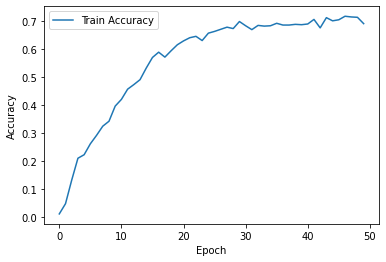

In [90]:
plt.plot(history41.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

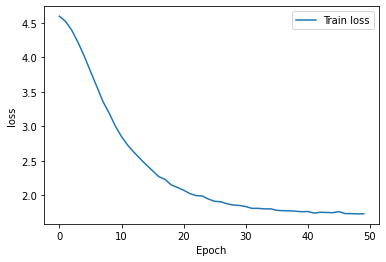

In [176]:
plt.plot(history41.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Trial2
- batch size=1
- we get
  -  accuracy: 1.0000 and  loss: 0.0057  on the training data
  - accuracy: 0.9545  and  loss: 0.1536  on the testing data


In [91]:
# model number one
drop_out_rate=.2
weight_decay=.01
Hidden_Size=50
batch_size=1

# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
optimizer    = tf.keras.optimizers.Adam(learning_rate=.1,weight_decay=weight_decay)
# optimizer    = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.1,weight_decay=weight_decay)
# optimizer    = SGD(learning_rate=0.1, momentum=0.9,weight_decay=weight_decay,)
# ============================================================================
# ============================================================================
model42 = keras.Sequential()
model42.add(keras.Input(shape=(192,)))
model42.add(layers.Dense(Hidden_Size, activation="tanh",))
model42.add(Dropout(drop_out_rate))
model42.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model42.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history42 = model42.fit(X_train, y_train, batch_size=batch_size, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model42.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model42.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1536 - accuracy: 0.9545


[0.15362003445625305, 0.9545454382896423]

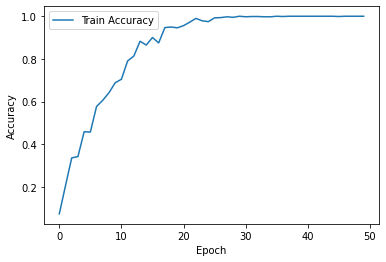

In [93]:
plt.plot(history42.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

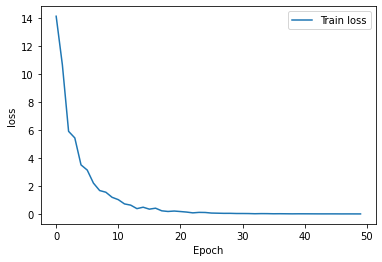

In [175]:
plt.plot(history42.history['loss'], label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Trial3
- batch size=100

- we get
  -  accuracy: 1.0000 and  loss: 0.0094  on the training data
  - accuracy: 0.9545  and  loss: 0.1846  on the testing data


In [94]:
# model number one
drop_out_rate=.2
weight_decay=.01
Hidden_Size=100
batch_size=100
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
optimizer    = tf.keras.optimizers.Adam(learning_rate=.1,weight_decay=weight_decay,)
# optimizer    = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.1,weight_decay=weight_decay,)
# optimizer    = SGD(learning_rate=0.1, momentum=0.9,weight_decay=weight_decay,)
# ============================================================================
# ============================================================================
model43 = keras.Sequential()
model43.add(keras.Input(shape=(192,)))
model43.add(layers.Dense(Hidden_Size, activation="tanh",))
model43.add(Dropout(drop_out_rate))
model43.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
model43.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history43 = model43.fit(X_train, y_train, batch_size=batch_size, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
model43.evaluate(X_train, y_train)
# ============================================================================
# ============================================================================
model43.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9545


[0.18462195992469788, 0.9545454382896423]

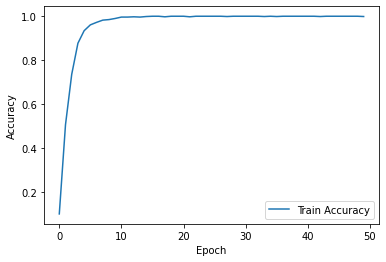

In [96]:
plt.plot(history43.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

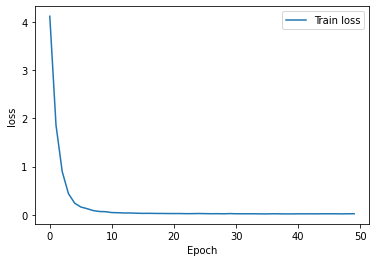

In [174]:
plt.plot(history43.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# the best model is  
- when
 - normalize the data
 - use adam optimizer
 - drop out rate is .7
 - weight_decay=.01
 - Hidden_Size=100



In [157]:
# model number one
drop_out_rate=.7
weight_decay=.01
Hidden_Size=100
batch_size=1
# ============================================================================
# ============================================================================
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
optimizer    = tf.keras.optimizers.Adam(learning_rate=.1,weight_decay=weight_decay,)

# ============================================================================
# ============================================================================
opt = keras.Sequential()
opt.add(keras.Input(shape=(192,)))
opt.add(layers.Dense(Hidden_Size, activation="tanh",))
opt.add(Dropout(drop_out_rate))
opt.add(layers.Dense(99, activation='softmax',))
# ============================================================================
# ============================================================================
opt.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ============================================================================
# ============================================================================
# fit model
history_opt = opt.fit(train_Norm, y_train, batch_size=batch_size, epochs=50, callbacks=[callback],verbose=0)
# ============================================================================
# ============================================================================
opt.evaluate(train_Norm, y_train)
# ============================================================================
# ============================================================================
opt.evaluate(test_Norm, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9848


[0.0708613470196724, 0.9848484992980957]

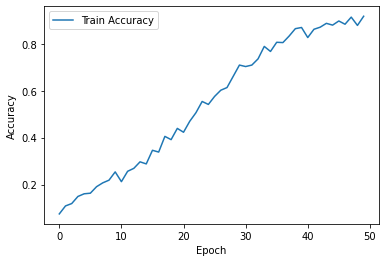

In [158]:
plt.plot(history_opt.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

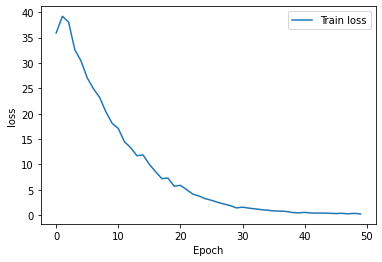

In [173]:
plt.plot(history_opt.history['loss'], label='Train loss')
# plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()